In [184]:
import pandas as pd   
import numpy as np 
import json 

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler  
from sklearn.model_selection import train_test_split  
from sklearn.impute import KNNImputer

from utils import replace_missing_values

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report


In [142]:
TRAIN_user_data_route = '/Users/nathanjones/Downloads/NUWE/CodingChallenges/Smart Strategies for an Effective Marketing Campaign (Classification)/Repo/nuwe-data-ds1/train/user_train.csv'  
TRAIN_session_data_route = '/Users/nathanjones/Downloads/NUWE/CodingChallenges/Smart Strategies for an Effective Marketing Campaign (Classification)/Repo/nuwe-data-ds1/train/session_train.csv'

TRAIN_user_data_df = pd.read_csv(TRAIN_user_data_route, sep=';')  
TRAIN_session_data_df = pd.read_csv(TRAIN_session_data_route, sep=',')

In [143]:
df = pd.merge(TRAIN_user_data_df, TRAIN_session_data_df, on="user_id", how="left")

### overview

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6877 entries, 0 to 6876
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           6877 non-null   object
 1   age               6877 non-null   int64 
 2   abandoned_cart    6877 non-null   bool  
 3   user_category     6877 non-null   object
 4   marketing_target  6877 non-null   int64 
 5   session_id        6877 non-null   object
 6   timestamp         6877 non-null   object
 7   device_type       6877 non-null   object
 8   browser           6877 non-null   object
 9   operating_system  6877 non-null   object
 10  ip_address        6877 non-null   object
 11  country           6877 non-null   object
 12  search_query      6877 non-null   object
 13  page_views        6877 non-null   int64 
 14  session_duration  6877 non-null   int64 
dtypes: bool(1), int64(4), object(10)
memory usage: 759.0+ KB


In [145]:
missing_values = {'none', 'missing', 'empty', '?', 'na', 'null', 'undefined', 'unknown', 'n/a'}  

def replace_missing_values(df):
    """
    Replaces common text representations of missing values with np.nan.
    
    Args:
    df (DataFrame): Input dataframe
    
    Returns:
    DataFrame: Modified dataframe with missing values replaced
    """
    return df.applymap(lambda x: np.nan if isinstance(x, str) and x.strip().lower() in missing_values else x)

In [146]:
replace_missing_values(df)

/var/folders/79/phpgk8h572b60699bk5qy1r40000gn/T/ipykernel_45431/3655822099.py:13: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  return df.applymap(lambda x: np.nan if isinstance(x, str) and x.strip().lower() in missing_values else x)


,user_id,age,abandoned_cart,user_category,marketing_target,session_id,timestamp,device_type,browser,operating_system,ip_address,country,search_query,page_views,session_duration
0,a806c313-9bc3-4c1b-bdc4-24e9b0cdec8e,28,False,premium_subscriber,1,de10a475-e7a4-4086-8025-19e371af79e2,2023-03-22 00:03:46,mobile,Safari,Windows,157.33.207.208,Lithuania,Middle beat later can.,6,235
1,a806c313-9bc3-4c1b-bdc4-24e9b0cdec8e,28,False,premium_subscriber,1,6a863d00-21dd-4fb0-9d10-e0494ab999ce,2023-04-26 05:09:21,mobile,Firefox,macOS,9.197.105.100,United States of America,Myself mean issue option sign for mission.,3,196
2,a806c313-9bc3-4c1b-bdc4-24e9b0cdec8e,28,False,premium_subscriber,1,d8f3dc0d-d343-4b85-86d3-f7b0fc64bbdc,2023-02-23 14:04:10,desktop,Firefox,Windows,117.121.111.15,Moldova,Ground hear growth get woman allow.,5,174
3,a806c313-9bc3-4c1b-bdc4-24e9b0cdec8e,28,False,premium_subscriber,1,dff85134-a9f1-4687-b222-abad3cdc5b0e,2023-08-15 15:24:36,mobile,Chrome,Android,174.110.113.128,Gabon,Western them social station common best measure.,3,285
4,a806c313-9bc3-4c1b-bdc4-24e9b0cdec8e,28,False,premium_subscriber,1,23bccabf-f335-4d4d-a916-8785da73a47f,2023-02-14 14:39:35,desktop,Firefox,macOS,214.253.53.156,Mozambique,Least that wait teach also she.,8,237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6872,d25667f3-471b-45d5-9398-dd0164e82ded,36,True,recurring_user,2,70efe82b-f5db-41d6-8a19-e28b63ef5e5f,2023-04-18 19:12:38,mobile,Firefox,Android,160.24.222.177,Ecuador,Picture system cost after town admit stock.,3,288
6873,d25667f3-471b-45d5-9398-dd0164e82ded,36,True,recurring_user,2,3d654e9c-3544-47ab-8c06-caf6438d93ca,2023-06-22 06:03:32,tablet,Edge,iOS,85.78.211.85,British Virgin Islands,Television create loss attorney world especial...,9,240
6874,d25667f3-471b-45d5-9398-dd0164e82ded,36,True,recurring_user,2,43a3d971-bb60-41af-b1a5-c2b14180a930,2023-06-02 20:01:48,tablet,Chrome,macOS,154.65.212.193,Iran,Mission person thus teacher.,9,239
6875,d25667f3-471b-45d5-9398-dd0164e82ded,36,True,recurring_user,2,537ee92d-bf32-4025-9316-78ac20578d3c,2023-03-07 05:45:19,tablet,Firefox,Linux,6.187.159.66,Spain,Doctor knowledge sister he pick next them prod...,6,24


In [147]:
df.select_dtypes(include=['number']).describe()

,age,marketing_target,page_views,session_duration
count,6877.000000,6877.000000,6877.000000,6877.000000
mean,43.835248,1.319471,6.536135,160.271630
std,15.011816,0.624672,2.280831,80.590149
min,18.000000,1.000000,3.000000,20.000000
25%,31.000000,1.000000,5.000000,90.000000
50%,44.000000,1.000000,7.000000,161.000000
75%,56.000000,1.000000,9.000000,228.000000
max,70.000000,3.000000,10.000000,300.000000


In [148]:
df['marketing_target'].value_counts()

marketing_target
1    5274
2    1009
3     594
Name: count, dtype: int64

### Split

In [149]:
#Combine the categorical columns into one for stratification  

df['stratify_col'] = df[['user_category', 'device_type', 'browser', 'marketing_target']].astype(str).agg('-'.join, axis=1)  

#Split the data  

TRAIN_subset, TEST_subset = train_test_split(df, test_size=0.2, random_state=42, stratify=df['stratify_col'])

#Drop the temporary stratification column  

TRAIN_subset.drop('stratify_col', axis=1, inplace=True)
TEST_subset.drop('stratify_col', axis=1, inplace=True)

### Explore Categorical Variables

In [150]:
def explore_categorical_data(df_train, df_test):  
    """
    A function to explore and check categorical variables for missing values, unique values, 
    and value distributions in both the training and testing datasets.
    
    Args:
    df_train (DataFrame): The training dataset.
    df_test (DataFrame): The testing dataset.
    
    Returns:
    None: Prints results for each step of exploration.
    """
    
    # 1. Select categorical columns (object dtype)
    train_categorical = df_train.select_dtypes(include=['object'])
    test_categorical = df_test.select_dtypes(include=['object'])
    
    # 2. Check for missing values (null values)
    print("Missing values in training set:")
    print(train_categorical.isnull().sum())
    print("\nMissing values in testing set:")
    print(test_categorical.isnull().sum())
    
    # Calculate missing percentage
    missing_percentage_train = train_categorical.isnull().mean() * 100
    missing_percentage_test = test_categorical.isnull().mean() * 100
    
    print("\nMissing percentage in training set:")
    print(missing_percentage_train)
    print("\nMissing percentage in testing set:")
    print(missing_percentage_test)
    
    # 3. Check for the number of unique values in each categorical column
    print("\nNumber of unique values in the training set:")
    print(train_categorical.nunique())
    print("\nNumber of unique values in the testing set:")
    print(test_categorical.nunique())
    
    # 4. Check value counts for each categorical column
    print("\nValue counts for each categorical column in the training set:")
    for col in train_categorical.columns:
        print(f"\n{col} value counts:")
        print(train_categorical[col].value_counts())
    
    print("\nValue counts for each categorical column in the testing set:")
    for col in test_categorical.columns:
        print(f"\n{col} value counts:")
        print(test_categorical[col].value_counts())

In [151]:
explore_categorical_data(TRAIN_subset, TEST_subset)

Missing values in training set:
user_id             0
user_category       0
session_id          0
timestamp           0
device_type         0
browser             0
operating_system    0
ip_address          0
country             0
search_query        0
dtype: int64

Missing values in testing set:
user_id             0
user_category       0
session_id          0
timestamp           0
device_type         0
browser             0
operating_system    0
ip_address          0
country             0
search_query        0
dtype: int64

Missing percentage in training set:
user_id             0.0
user_category       0.0
session_id          0.0
timestamp           0.0
device_type         0.0
browser             0.0
operating_system    0.0
ip_address          0.0
country             0.0
search_query        0.0
dtype: float64

Missing percentage in testing set:
user_id             0.0
user_category       0.0
session_id          0.0
timestamp           0.0
device_type         0.0
browser             0.

### Data Engineering

In [152]:
def feature_engineering(df):

    """
    Engineers new features. For CodingChallenge, to be applied to TRAIN_subset df, TEST_subset df, and then TEST_df, seperately:  
    - total_sessions
    - user_purchase_rate
    - total_page_views
    - avg_session_duration
    - total_session_duration
    - user_category_encoded
    - browser_purchase_rate
    - device_purchase_rate

    Args:
    df to be engineered. 
    
    Returns:
    None: The input DataFrame is augmented with new features.
    """

    #3(a) numeric values of interest

    #3(a)(I) session_id  
    #Engineer: **total_sessions**  
    df['total_sessions'] = df.groupby('user_id')['session_id'].transform('count')

    # 3(a)(II) abandoned_cart
    #Engineer: **user_purchase_rate**  
    df['total_purchases'] = df.groupby('user_id')['abandoned_cart'].transform(lambda x: (x == 0).sum())
    df['purchase_rate'] = (df['total_purchases'] / df['total_sessions']) * 100

    # 3(a)(III) page_views
    #Engineer: **total_page_views**

    df['total_page_views'] = df.groupby('user_id')['page_views'].transform('sum')

    # 3(a)(IV) session_duration
    #Engineer: **avg_session_duration**

    df['avg_session_duration'] = df.groupby('user_id')['session_duration'].transform('mean')

    # 3(a)(V) session_duration
    #Engineer: **total_session_duration**

    df['total_session_duration'] = df.groupby('user_id')['session_duration'].transform('sum')



    # 3(b) categoric values of interest

    # 3(b)(I) user_category
    #Encode engineer: **user_category_encoded** (ordinal)  

    user_category_values = {'new_user': 1, 'recurring_user': 2, 'premium_user': 3}
    df['user_category_encoded'] = df['user_category'].map(user_category_values).fillna(0).astype(int)

    # 3(b)(II) browser 
    #Encode engineer: **browser_purchase_rate**
    purchase_rate_by_browser = df.groupby('browser')['abandoned_cart'].apply(lambda x: (x == 0).sum() / len(x) * 100)
    df['browser_purchase_rate'] = df['browser'].map(purchase_rate_by_browser)

    # 3(b)(III) device_type 
    #Encode engineer: **device_purchase_rate**
    purchase_rate_by_device = df.groupby('device_type')['abandoned_cart'].apply(lambda x: (x == 0).sum() / len(x) * 100)
    df['device_purchase_rate'] = df['device_type'].map(purchase_rate_by_device)


    return df

In [153]:
feature_engineering(TRAIN_subset)

,user_id,age,abandoned_cart,user_category,marketing_target,session_id,timestamp,device_type,browser,operating_system,...,session_duration,total_sessions,total_purchases,purchase_rate,total_page_views,avg_session_duration,total_session_duration,user_category_encoded,browser_purchase_rate,device_purchase_rate
3031,af0c20f2-43a3-4457-9492-a8a359a074c1,37,True,recurring_user,1,32f5ef4e-68c3-4fb8-8345-2bf324c51fa5,2023-01-11 16:03:14,mobile,Chrome,macOS,...,259,7,0,0.0,52,199.857143,1399,2,50.434783,51.648352
581,d8f4e0f7-9b2e-418b-84cf-160185221d6d,69,False,new_user,1,824a94d6-f908-41df-a5f8-e05263a642ec,2023-06-09 01:28:30,mobile,Firefox,macOS,...,43,12,12,100.0,84,182.500000,2190,1,53.392990,51.648352
4452,07989b3a-17b6-4934-8d99-4e962e42e7be,21,True,recurring_user,1,b53e6abc-a7cb-4e45-ad87-b0b1e46434b7,2023-10-26 04:42:54,mobile,Chrome,iOS,...,159,6,0,0.0,39,155.333333,932,2,50.434783,51.648352
1049,03ae8e59-096c-4369-b14c-e5cadf7b7478,35,True,premium_subscriber,2,f6e4e4a3-d246-42ef-ae22-1803ca8cd313,2023-05-02 08:43:25,mobile,Chrome,iOS,...,201,7,0,0.0,44,183.285714,1283,0,50.434783,51.648352
1074,a7dee618-e74e-45c3-a332-5245687ccc7a,54,False,new_user,1,b4ca5119-7bdc-40f0-bce1-deb83ea2ab4f,2023-05-12 08:04:42,tablet,Firefox,iOS,...,93,10,10,100.0,61,135.800000,1358,1,53.392990,51.277955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3484,22715def-509b-4ebf-bb39-9ad6bb08421d,58,True,new_user,1,da8ad2e9-135c-4493-9c68-2b9849b07637,2023-04-29 04:49:48,desktop,Chrome,iOS,...,258,12,0,0.0,75,149.500000,1794,1,50.434783,52.745424
2815,79e5002b-9df2-4c40-a20f-72fe986af674,58,True,recurring_user,3,ea3020b5-8985-4e38-bef6-d76a0583a2b0,2023-10-25 04:11:43,desktop,Chrome,Linux,...,228,10,0,0.0,68,185.100000,1851,2,50.434783,52.745424
3215,86ac393e-487c-4b64-9244-4de33e05ffc5,33,True,recurring_user,2,9b268a20-672c-401d-9c91-e82d9efd4f5e,2023-08-14 07:05:23,tablet,Edge,Android,...,196,8,0,0.0,44,170.750000,1366,2,50.947368,51.277955
1775,16a53417-c62d-4bfd-9e37-9118caee73a9,56,True,new_user,1,a8ce6079-c308-41b0-9c62-318482796fd8,2023-06-17 20:45:15,desktop,Edge,Android,...,201,9,0,0.0,72,133.777778,1204,1,50.947368,52.745424


In [154]:
feature_engineering(TEST_subset)

,user_id,age,abandoned_cart,user_category,marketing_target,session_id,timestamp,device_type,browser,operating_system,...,session_duration,total_sessions,total_purchases,purchase_rate,total_page_views,avg_session_duration,total_session_duration,user_category_encoded,browser_purchase_rate,device_purchase_rate
4970,d29e2a06-daa7-436f-a61c-9061dc312687,31,True,new_user,2,6869e3df-a00b-42fe-9cab-e2a745f755ac,2023-07-01 10:42:32,tablet,Chrome,iOS,...,203,2,0,0.0,11,179.500000,359,1,51.149425,47.109208
241,22f3b4b2-4e63-4977-9450-4562a26d536b,42,True,new_user,2,f97c53ae-adb5-48ca-ab92-69ea3ab5e2ac,2023-05-03 19:04:59,mobile,Edge,Android,...,208,4,0,0.0,26,187.000000,748,1,47.058824,47.930283
2442,f0aec817-41d6-49a4-8c7b-4fff293c4b4c,66,True,premium_subscriber,1,2ab1db07-e17f-4725-baaf-fff9df7801ff,2023-08-09 02:44:01,tablet,Firefox,Windows,...,176,3,0,0.0,26,181.666667,545,0,46.546547,47.109208
2153,fddcb447-bb39-4044-ab8d-33109f395d9a,54,False,new_user,1,8ee668a5-fe87-43c2-ad01-eeb09c685cc1,2023-08-16 12:45:02,tablet,Firefox,Linux,...,120,3,3,100.0,20,118.333333,355,1,46.546547,47.109208
1347,f1726762-be74-4879-84ff-f9b9ff1249e0,39,False,new_user,2,b3ce3a49-7c8c-4c3a-abda-a3f4155309c8,2023-07-24 07:29:31,desktop,Firefox,Windows,...,172,4,4,100.0,21,214.000000,856,1,46.546547,49.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3047,ad33a604-2b0b-4f42-a880-50fb64f5d396,49,False,recurring_user,2,c31fe2c2-cef6-440a-a5e9-5a316c2b89b6,2023-07-11 01:06:21,desktop,Safari,Linux,...,155,4,4,100.0,33,123.500000,494,2,47.633136,49.333333
1532,56c0306f-cf21-47ea-a1cc-570c53cc84b9,27,True,recurring_user,1,f0ef0317-b589-462c-b4c6-65dfe4c86486,2023-10-20 13:42:09,mobile,Edge,Linux,...,61,5,0,0.0,34,68.800000,344,2,47.058824,47.930283
1550,787f2848-7893-4443-b197-ac332b1d8bb0,48,False,new_user,1,719125b9-83ba-4212-a1ba-5c27bfdfbd5e,2023-05-09 16:57:56,mobile,Edge,macOS,...,233,3,3,100.0,23,160.000000,480,1,47.058824,47.930283
4175,16176ff6-c79f-431d-a6f3-6d2756d3b0cc,28,True,new_user,3,14505550-6ca4-4635-9632-807e7e0a4a2f,2023-01-16 21:58:15,desktop,Edge,Windows,...,283,3,0,0.0,16,175.000000,525,1,47.058824,49.333333


### Feature Selection

<Axes: >

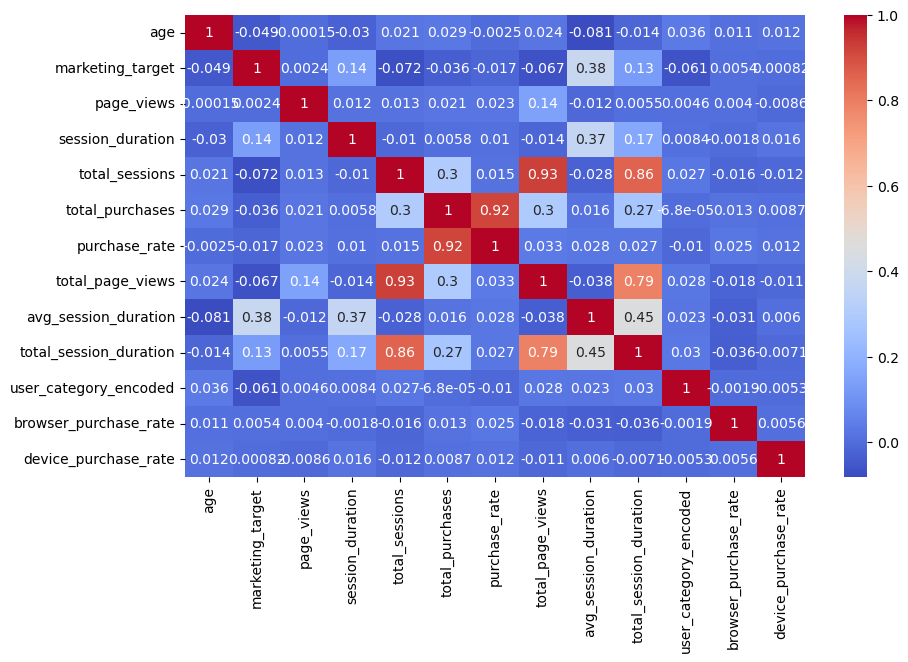

In [155]:
plt.figure(figsize=(10,6))
sns.heatmap(TRAIN_subset.select_dtypes(include=['number']).corr(), cmap='coolwarm', annot=True)

In [156]:
TRAIN_subset.size

132024

In [157]:
TEST_subset.size

33024

In [158]:
model_features = ['device_purchase_rate', 
                  'browser_purchase_rate', 
                  'user_category_encoded',
                  'avg_session_duration',
                  'total_page_views',
                  'total_sessions']  

X_train = TRAIN_subset[model_features]  
y_train = TRAIN_subset['marketing_target']  

X_test = TEST_subset[model_features]  
y_test = TEST_subset['marketing_target']

print('X_train shape:', X_train.shape)  
print('y_train shape:', y_train.shape)  
print('X_test shape:', X_test.shape)  
print('y_test shape:', y_test.shape)

X_train shape: (5501, 6)
y_train shape: (5501,)
X_test shape: (1376, 6)
y_test shape: (1376,)


In [165]:
# Synthetic Minority Over-Sampling
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


### RFC model

In [166]:
rf = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf.fit(X_train_resampled, y_train_resampled)




RandomForestClassifier(class_weight='balanced', random_state=42)

In [167]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
f1_scores = cross_val_score(rf, X_train_resampled, y_train_resampled, cv=cv, scoring='f1_weighted')


In [168]:
print(f"Cross-validation F1-scores: {f1_scores}")
print(f"Mean F1-score: {np.mean(f1_scores):.4f}")
print(f"Standard deviation: {np.std(f1_scores):.4f}")

Cross-validation F1-scores: [0.9928933  0.98540024 0.98617743 0.98695173 0.98736803]
Mean F1-score: 0.9878
Standard deviation: 0.0027


#### Test

In [169]:
# Predict on test set
y_pred = rf.predict(X_test)

In [170]:
# Evaluate performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.81      0.78      0.79      1055
           2       0.18      0.27      0.22       206
           3       0.50      0.21      0.29       115

    accuracy                           0.66      1376
   macro avg       0.50      0.42      0.44      1376
weighted avg       0.69      0.66      0.67      1376



### Test csv

In [173]:
TEST_user_data_route = '/Users/nathanjones/Downloads/NUWE/CodingChallenges/Smart Strategies for an Effective Marketing Campaign (Classification)/Repo/nuwe-data-ds1/test/user_test.csv'  
TEST_session_data_route = '/Users/nathanjones/Downloads/NUWE/CodingChallenges/Smart Strategies for an Effective Marketing Campaign (Classification)/Repo/nuwe-data-ds1/test/session_test.csv'

TEST_user_data_df = pd.read_csv(TEST_user_data_route, sep=';')  
TEST_session_data_df = pd.read_csv(TEST_session_data_route, sep=',')

In [174]:
TEST_user_data_df.head(5)

,user_id,age,abandoned_cart,user_category,test_id
0,6647f967-609f-4ae3-986b-424ffbf0460a,52,True,new_user,1
1,ca149ac0-0832-4bcd-8af0-43c2d8f06556,45,True,new_user,2
2,b0d21d65-e040-418d-af69-0be68b456792,29,False,new_user,3
3,42519363-3dcf-445a-8116-dced9581cbd7,20,False,recurring_user,4
4,9d582590-d05e-4c79-8b18-3feb98864927,55,True,recurring_user,5


In [175]:
TEST_session_data_df.head()

,user_id,session_id,timestamp,device_type,browser,operating_system,ip_address,country,search_query,page_views,session_duration
0,1982e6a0-077b-49f2-bc6e-84411c326f90,f0da5632-1c71-4c93-b2fd-f5423adc063c,2023-08-15 05:58:37,tablet,Edge,Windows,137.193.176.120,Kenya,As program perhaps high.,6,240
1,1982e6a0-077b-49f2-bc6e-84411c326f90,a48fbcc6-13a5-425c-9c2f-7413d8fd5e51,2023-10-22 22:47:09,desktop,Chrome,Windows,149.188.238.246,Svalbard & Jan Mayen Islands,Goal wonder allow ability get.,8,253
2,1982e6a0-077b-49f2-bc6e-84411c326f90,3f86b518-2dbd-4f81-b261-f16d6573f035,2023-01-06 21:33:30,mobile,Chrome,Android,218.150.179.144,Hungary,Month vote rich already stock.,7,196
3,1982e6a0-077b-49f2-bc6e-84411c326f90,14be0db1-c86f-4db0-b4b5-ff1a97615232,2023-10-07 04:50:38,desktop,Edge,macOS,40.157.118.33,United States Virgin Islands,Owner produce bring factor subject shoulder who.,10,126
4,1982e6a0-077b-49f2-bc6e-84411c326f90,5f5b2da5-4fa2-4877-b930-a57dd6303964,2023-08-25 15:54:55,mobile,Edge,Android,63.173.100.237,Mayotte,Ask key central rate within television appear.,8,138


In [176]:
TEST_df = df = pd.merge(TEST_user_data_df, TEST_session_data_df, on="user_id", how="left")

In [177]:
TEST_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3026 entries, 0 to 3025
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   user_id           3026 non-null   object
 1   age               3026 non-null   int64 
 2   abandoned_cart    3026 non-null   bool  
 3   user_category     3026 non-null   object
 4   test_id           3026 non-null   int64 
 5   session_id        3026 non-null   object
 6   timestamp         3026 non-null   object
 7   device_type       3026 non-null   object
 8   browser           3026 non-null   object
 9   operating_system  3026 non-null   object
 10  ip_address        3026 non-null   object
 11  country           3026 non-null   object
 12  search_query      3026 non-null   object
 13  page_views        3026 non-null   int64 
 14  session_duration  3026 non-null   int64 
dtypes: bool(1), int64(4), object(10)
memory usage: 334.1+ KB


In [178]:
feature_engineering(TEST_df)

,user_id,age,abandoned_cart,user_category,test_id,session_id,timestamp,device_type,browser,operating_system,...,session_duration,total_sessions,total_purchases,purchase_rate,total_page_views,avg_session_duration,total_session_duration,user_category_encoded,browser_purchase_rate,device_purchase_rate
0,6647f967-609f-4ae3-986b-424ffbf0460a,52,True,new_user,1,0eb6fb97-c722-442a-87c4-1f444ff514f7,2023-08-08 13:55:39,tablet,Edge,Android,...,75,5,0,0.0,27,92.000000,460,1,51.931330,52.144250
1,6647f967-609f-4ae3-986b-424ffbf0460a,52,True,new_user,1,054f90d4-29ec-4bbd-9cd1-d9aae25a45ca,2023-05-13 12:17:48,tablet,Firefox,macOS,...,78,5,0,0.0,27,92.000000,460,1,54.942234,52.144250
2,6647f967-609f-4ae3-986b-424ffbf0460a,52,True,new_user,1,ab000a90-ca6e-44a1-aeb3-f79d950b5083,2023-02-22 00:09:04,desktop,Edge,iOS,...,77,5,0,0.0,27,92.000000,460,1,51.931330,54.915591
3,6647f967-609f-4ae3-986b-424ffbf0460a,52,True,new_user,1,1c40afe4-fa66-47ef-a96d-8e7dfa1865e9,2023-04-27 09:04:32,mobile,Chrome,iOS,...,166,5,0,0.0,27,92.000000,460,1,53.585398,52.970796
4,6647f967-609f-4ae3-986b-424ffbf0460a,52,True,new_user,1,e425a78c-4c56-4c6a-8825-b9cb3f28fdd8,2023-01-05 09:53:11,tablet,Edge,macOS,...,64,5,0,0.0,27,92.000000,460,1,51.931330,52.144250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3021,541da13d-6f7c-4618-8653-4df09befd7f1,31,False,recurring_user,300,5dbab17d-a852-4119-a927-b04dfb3a4174,2023-03-28 07:26:43,desktop,Edge,macOS,...,251,15,15,100.0,99,142.066667,2131,2,51.931330,54.915591
3022,541da13d-6f7c-4618-8653-4df09befd7f1,31,False,recurring_user,300,a6ddde6a-b4dd-4714-944a-280c7408ac9b,2023-05-13 18:06:00,mobile,Safari,Android,...,223,15,15,100.0,99,142.066667,2131,2,52.752881,52.970796
3023,541da13d-6f7c-4618-8653-4df09befd7f1,31,False,recurring_user,300,588491ff-2c93-4721-9384-f7f14591f082,2023-10-04 09:42:42,desktop,Edge,macOS,...,101,15,15,100.0,99,142.066667,2131,2,51.931330,54.915591
3024,541da13d-6f7c-4618-8653-4df09befd7f1,31,False,recurring_user,300,80a7e143-45e8-4fb6-b20f-daf524f6a0a8,2023-03-12 12:55:33,desktop,Edge,Windows,...,288,15,15,100.0,99,142.066667,2131,2,51.931330,54.915591


In [183]:
TEST_X = TEST_df[model_features]  
TEST_y_pred = rf.predict(TEST_X)

In [189]:
TEST_X.shape

(3026, 6)

In [188]:
TEST_y_pred.shape


(3026,)

In [191]:
predictions_df = pd.DataFrame({'test_id': TEST_df['test_id'], 'target': TEST_y_pred})


In [192]:
predictions_df.head(10)

,test_id,target
0,1,2
1,1,2
2,1,1
3,1,1
4,1,2
5,2,1
6,2,1
7,2,2
8,2,1
9,2,2


In [193]:
final_predictions = predictions_df.groupby('test_id')['target'].agg(lambda x: x.mode()[0])

In [195]:
final_predictions


test_id
1      2
2      1
3      1
4      1
5      1
      ..
296    1
297    1
298    1
299    2
300    1
Name: target, Length: 300, dtype: int64

In [198]:
# Convert to the desired dictionary format for the submission
submission_dict = {"target": final_predictions.to_dict()}

file_path = '/Users/nathanjones/Downloads/NUWE/CodingChallenges/Smart Strategies for an Effective Marketing Campaign (Classification)/Repo/nuwe-data-ds1/predictions/predictions.json'

# Save as JSON file
with open(file_path, "w") as f:
    json.dump(submission_dict, f, indent=4)